In [210]:
from skimage.io import imread_collection , concatenate_images
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.utils import shuffle 
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import pywt as ptw
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import copy as cp
from skimage.io.manage_plugins import _inject_imread_collection_if_needed




In [211]:
def draw(image):
    plt.imshow(image)
    plt.show()
    return

def hwavelet(images, n):
    cA = images
    for i in range(n):
        cA, (cH, cV, cD) = ptw.dwt2(cA, 'haar')
    return cA

def normalizar(dataset):
    aux = []
    for i in range(len(dataset)):
        aux = aux + [dataset[i].reshape(24*24).tolist()]
    return aux

def load(emotion, emotion_arr):
    aux = imread_collection(emotion_arr)
    aux_lb = [emotion] * len(aux)
    for i in range(len(aux)):
        all_images.append(aux[i])
        all_labels.append(aux_lb[i])



In [212]:
#paths
anger = 'images/anger/*.png'
contempt = 'images/contempt/*.png'
disgust = 'images/disgust/*.png'
fear = 'images/fear/*.png'
happy = 'images/happy/*.png'
sadness = 'images/sadness/*.png'
surprise = 'images/surprise/*.png'

#input y output
all_images = []
all_labels = []

#load en input y output
load('ANGER', anger)
load('CONTEMPT', contempt)
load('DISGUST', disgust)
load('FEAR', fear)
load('HAPPY', happy)
load('SADNESS', sadness)
load('SURPRISE', surprise)

#procesamiento
all_images_processed = hwavelet(all_images,1)
all_images_processed_normalized = normalizar(all_images_processed)

#print(len(all_images))
#print(len(all_labels))


In [213]:
def bootstrap(k,n, algo,neighbors):
    tam = len(all_images_processed) 
    t = tam
    ps = []
    result = []
    error = 0
    errores = []
    varianza = 0
    res = []
    for i in range(tam):
        ps.append((all_images_processed[i], all_images_processed_normalized[i], all_labels[i]))
    ds = shuffle(ps, random_state = 0)
    total_aciertos = 0
    total_samples = n
    if n==0:
        total_samples = 0
    
    for i in range(k):
        if n==0:
            n = random.randint(0,tam)
            total_samples += n
        idxs = random.sample(range(0,tam), n)
        
        train_i = []
        train_l = []
        test_i = []
        test_l = []

        for i in range(tam):
            if i in idxs:
                test_i.append(ds[i][1])
                test_l.append(ds[i][2])
            else:
                train_i.append(ds[i][1])
                train_l.append(ds[i][2])


        knn = KNeighborsClassifier(n_neighbors=neighbors, algorithm=algo)

        knn.fit(train_i, train_l)

        aciertos = 0
        fallas = 0
        resultados = []
        for i in range(len(test_i)):
            predict = knn.predict([test_i[i]])
            resultados.append(predict)
            if predict == test_l[i]:
                aciertos += 1
            else:
                fallas += 1

        result.append(confusion_matrix(test_l, resultados, labels=["ANGER", "CONTEMPT", "DISGUST", "FEAR", "HAPPY", "SADNESS", "SURPRISE"]))
        # Error
        res.append([knn,test_i,test_l])
        error_i = (fallas / (aciertos + fallas))
        error += error_i
        errores.append(error_i)

       # for i in range(len(test_l)): print(test_l[i],resultados[i])

        i += 1
    # Varianza
    error_promedio = error/k
    for error_i in errores:
        varianza += (error_i - error_promedio)**2
    varianza /= (k - 1)

    print('El error es de:', str(round(error_promedio , 3)))
    print('La varianza es de:', varianza)

    return result, res
            #draw(test_im[i])
            #resultados.append('predict: '+ str(predict)+ ', real: ',str(test_l[i]))
            #if(i%3==0): print('predict: '+ str(predict)+ ', real: ',str(test_l[i]))
        

In [214]:


def kfold(k, algo, neighbors):
    tam = len(all_images_processed) 
    t = tam
    '''
    if tam % k != 0:
        print('choose another n')
        return
    '''
    diff = int(t/k)
    result = []
    ps = []
    res = []
    for i in range(tam):
        ps.append((all_images_processed[i], all_images_processed_normalized[i], all_labels[i]))

    ds = shuffle(ps, random_state = 0)

    #print(len(ds[1]))
    
    a = 0
    total_aciertos = 0

    error = 0
    errores = []
    varianza = 0
    for i in range(k):

        train_i = []
        train_l = []
        
        test_i = []
        test_l = []
        
        for i in range(t):
            
            if i in range(a,a+diff):
                test_i.append(ds[i][1])
                test_l.append(ds[i][2])
                
            else:
                train_i.append(ds[i][1])
                train_l.append(ds[i][2])
                
                
        a += diff

        knn = KNeighborsClassifier(n_neighbors=neighbors, algorithm=algo)

        knn.fit(train_i, train_l)

        aciertos = 0
        fallas = 0
        resultados = []
        for i in range(len(test_i)):
            predict = knn.predict([test_i[i]])
            resultados.append(predict)
            if predict == test_l[i]:
                aciertos += 1
            else:
                fallas += 1
            #draw(test_im[i])
            #resultados.append('predict: '+ str(predict)+ ', real: ',str(test_l[i]))
            #if(i%3==0): print('predict: '+ str(predict)+ ', real: ',str(test_l[i]))
        result.append(confusion_matrix(test_l, resultados, labels=["ANGER", "CONTEMPT", "DISGUST", "FEAR", "HAPPY", "SADNESS", "SURPRISE"]))
        error_i = (fallas / (fallas+aciertos))
        error += error_i
        errores.append(error_i)
        res.append([knn,test_i,test_l])
    error_promedio = error/k
    for i in errores:
        varianza += (i - error_promedio)**2
    varianza /= (k-1)

    print('El error es de:', str(round(error_promedio ,3)))
    print('La varianza es de:', varianza)

    return result, res
               

    


    


In [215]:

def test_kfold(k, algo, neighbors):
    start = time.time()
    xd, res = kfold(k, algo, neighbors)
    end = time.time()
    print('Tiempo total de testing con', 'k-folds (k = ' + str(k) + ')', end-start, 'segundos.')
    diag = 0
    rest = 0
    count = 0
    for m in xd:
        for i in range(7):
            for j in range(7):
                if(i == j):
                    diag += m[i][j]
                else:
                    rest += m[i][j]
        print('accuracy for test '+str(count)+' ',diag/(rest+diag)*100)
        count+=1
    for result in res:
        plot_confusion_matrix(result[0], result[1], result[2])  
        plt.show()


def test_bootstrap(bf, ts, algo, neighbors):
    start = time.time()
    xd1, res = bootstrap(bf,ts, algo, neighbors)
    end = time.time()
    print('Tiempo total de testing con', 'bootstrap (k = ' + str(bf) + ')', end-start, 'segundos.')
    diag = 0
    rest = 0
    count = 0
    for m in xd1:
        for i in range(7):
            for j in range(7):
                if(i == j):
                    diag += m[i][j]
                else:
                    rest += m[i][j]
        print('accuracy for test '+str(count)+' ',diag/(rest+diag)*100)
        count += 1

    for result in res:
        plot_confusion_matrix(result[0], result[1], result[2])  
        plt.show()

BOOTSTRAP
El error es de: 0.507
La varianza es de: 0.0002465986394557821
Tiempo total de testing con bootstrap (k = 10) 12.270742893218994 segundos.
accuracy for test 0  49.642857142857146
accuracy for test 1  49.375
accuracy for test 2  49.76190476190476
accuracy for test 3  49.50892857142858
accuracy for test 4  49.714285714285715
accuracy for test 5  49.791666666666664
accuracy for test 6  49.97448979591837
accuracy for test 7  49.955357142857146
accuracy for test 8  49.583333333333336
accuracy for test 9  49.28571428571429


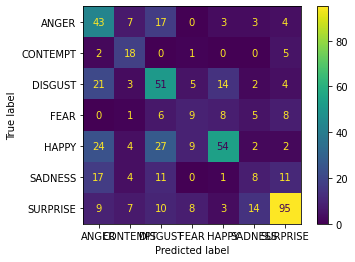

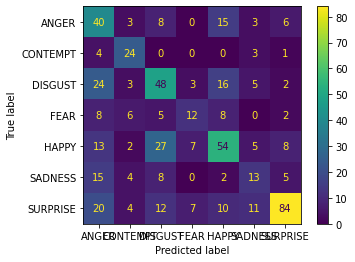

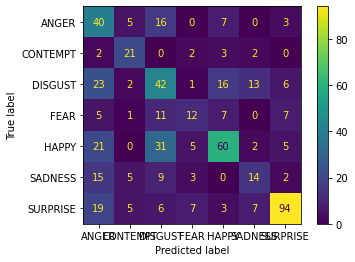

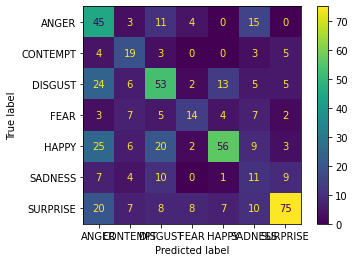

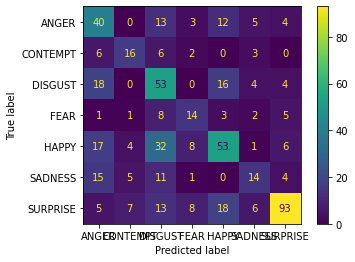

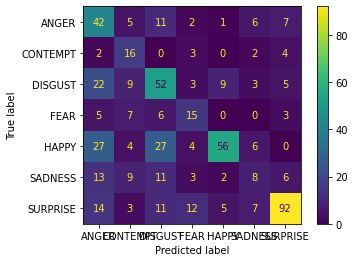

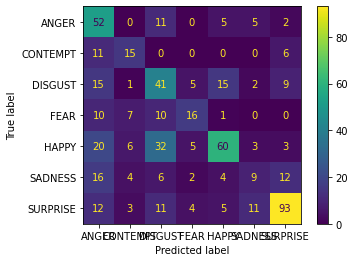

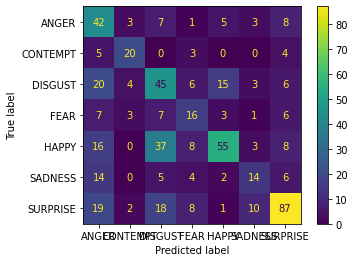

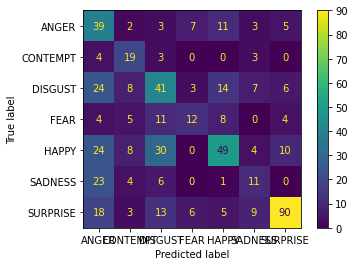

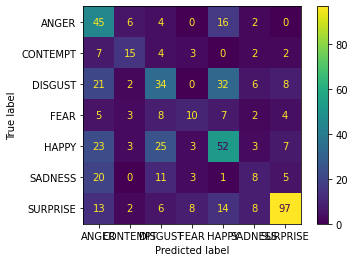

KFOLD
El error es de: 0.131
La varianza es de: 0.0014299597389976397
Tiempo total de testing con k-folds (k = 10) 4.409724950790405 segundos.
accuracy for test 0  86.73469387755102
accuracy for test 1  87.75510204081633
accuracy for test 2  86.39455782312925
accuracy for test 3  85.45918367346938
accuracy for test 4  86.93877551020408
accuracy for test 5  87.41496598639455
accuracy for test 6  86.73469387755102
accuracy for test 7  86.22448979591837
accuracy for test 8  86.62131519274377
accuracy for test 9  86.93877551020408


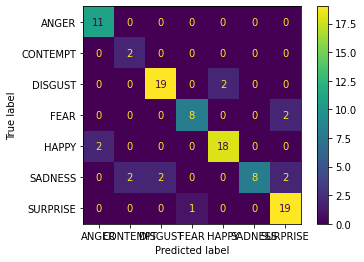

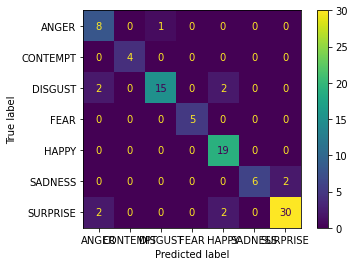

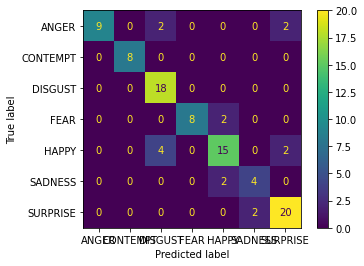

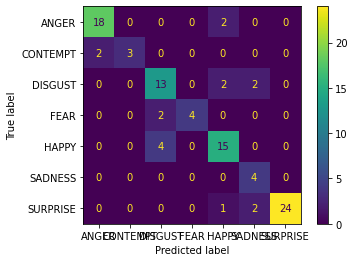

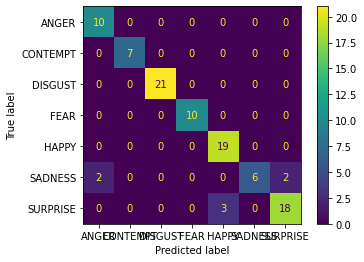

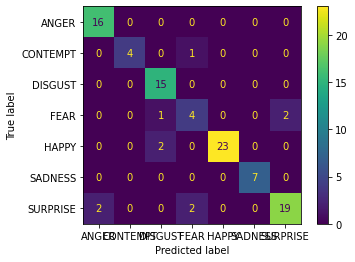

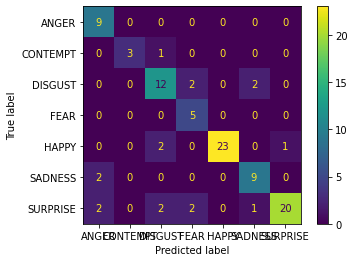

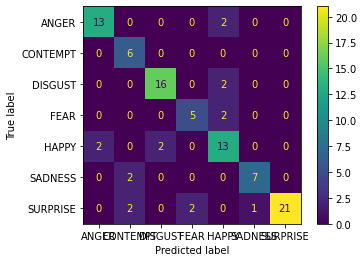

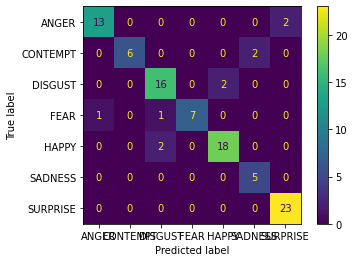

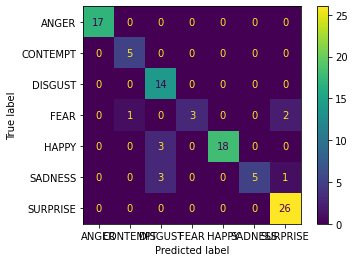

In [216]:
bootstrap_folds = 10
test_size = 0 #if 0, test_size randomizes every fold, train = ds-test_size
algo = 'ball_tree'
neighbors = 3
print('BOOTSTRAP')
test_bootstrap(bootstrap_folds, test_size, algo, neighbors) 


kfold_folds = 10
print('KFOLD')
test_kfold(kfold_folds, algo, neighbors)